# **Notebook used for Training YOLO V5 for ObjectDetection**

*   If you just want to see the model performance, run the first cell and go to the last cell.

*   If you want to retrain the model by yourself run the cells one by one.
if you want to try training the model by yourself, please use the GPU environment in colab.    


In [1]:
!git clone https://github.com/theUnrealSamurai/simple_classifier.git

Cloning into 'simple_classifier'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 369 (delta 4), reused 33 (delta 2), pack-reused 334
Receiving objects: 100% (369/369), 128.19 MiB | 33.32 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (443/443), done.


In [2]:
# Generating artificial dataset for training the model.

!mkdir /content/slot_machines # creating directory to store the generated images.
!python3 /content/simple_classifier/object_detection/data/data_generator.py --base_path "/content/slot_machines" --img_size 640 --n 500

# img_size is the size of image. 416 x 416 is used here.
# n represents the number of images you want to generate. 500 images generated in this case.
# base path is where you want to store the images.

# The generated images are automatically stored in the yolo format. inside the
# base directory, 2 folders will be created images and labels.
# inside the images directory the images will be stored.
# inside the lables direcotry the labels will be stored in a text file.
# the format for this text files is
# [class_index x_center y_center length width]
# each line contains bounding box for one object.

  2% 9/500 [02:12<2:00:06, 14.68s/it]

^C


In [3]:
# I am using the yolov5 model from this repository
!git clone https://www.github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 15921 (delta 17), reused 28 (delta 13), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.66 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (10916/10916), done.


In [8]:
!pip3 install -r /content/yolov5/requirements.txt

In [23]:
# Using the tools inside the repository to train the model for object detection.

# img is the image size. we are using 416. It can be anything but it has to be a multiple of 32.
# the data for the model is fed using a yaml file. The path to the file is given in the below command.
# weights we are using a pretrained yolo model. i.e. yolov5n

# the model is available in different sizes [YOLOv5n, YOLOv5s, YOLOv5m, YOLOv5l, YOLOv5x]
# [nano, small, medium, large, Xlarge] each alphabet in the above list represent this.
# we will be using the nano model. since our task is very simple. I might change this later on based on performance.

%cd /content/yolov5
!python3 train.py --img 416 --epochs 25 --data /content/simple_classifier/object_detection/yolo_v8_google_colab.yaml --weights yolov5n.pt

/content/yolov5
train: weights=yolov5n.pt, cfg=, data=/content/simple_classifier/object_detection/yolo_v8_google_colab.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, 

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-16 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1768636 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


          xmin        ymin        xmax        ymax  confidence  class  \
0   165.234207  132.050781  290.432465  203.673126    0.812620      4   
1   664.968201  217.396774  778.635559  281.781158    0.806823      5   
2   166.290024  212.058487  299.416260  272.136536    0.776336      5   
3   673.776184  143.169937  780.287170  207.819733    0.750731      4   
4   158.637268   59.631638  306.216583  125.795990    0.698194      5   
5   424.343262  138.845657  543.061035  215.803726    0.546249      5   
6   388.879181   65.253586  581.232483  135.728073    0.396398      0   
7     5.978492   84.078094   80.656990  140.407730    0.370047      1   
8   380.903656   60.693455  585.690247  130.460892    0.355861      6   
9   860.348633   88.405289  968.522949  133.474670    0.331047      6   
10  171.501205  136.558136  294.529266  213.024445    0.255635      5   
11    3.934010   96.999352   82.527145  178.568314    0.253142      1   

        name  
0   elephant  
1      grape  
2    

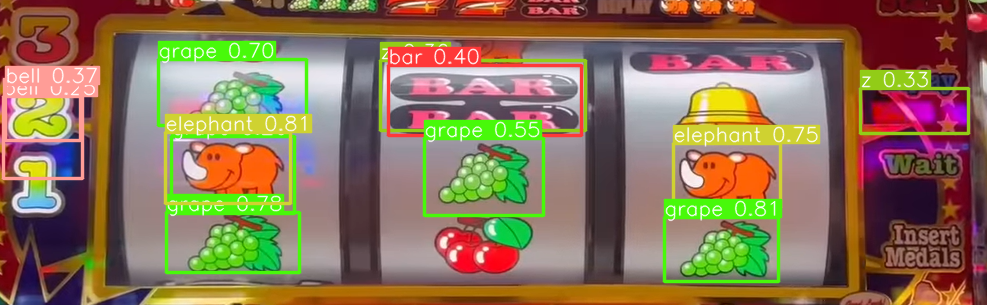

In [24]:
# Exporting the trained model to CoreML compatible format.

!python3 /content/yolov5/export.py --weights /content/yolov5/runs/train/exp/weights/best.pt --include coreml

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 26.7 MB/s eta

          xmin        ymin         xmax        ymax  confidence  class  \
0   201.434586  254.285934   330.895630  314.820648    0.796271      5   
1   203.768295  175.533646   324.429138  244.015488    0.711847      4   
2   457.420685  178.520096   577.543640  249.683716    0.685744      5   
3   207.787506  107.784447   337.818054  174.546402    0.577052      5   
4   693.007751  256.854095   843.874390  330.408905    0.562346      1   
5    34.287914  121.762230   110.296913  184.951752    0.539311      5   
6   695.402466  113.171921   833.387512  182.706573    0.532053      5   
7   686.401489  265.078674   852.082520  326.912659    0.471289      6   
8   917.318054  208.922516  1017.547668  263.095947    0.441752      3   
9   451.856873  113.629982   579.159912  167.742264    0.375988      1   
10  918.435669    0.471930  1084.119507   50.898823    0.363710      0   
11  451.410126  140.990143   584.802917  221.494217    0.332114      1   
12  694.459595  103.185196   847.51190

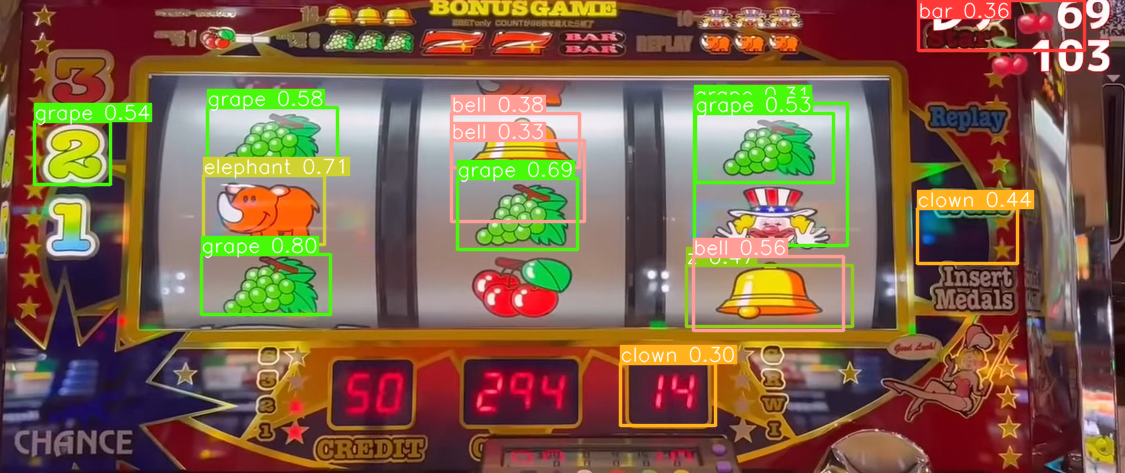

In [3]:
# Once we train the model we can use this code to execute the model and see it's performance.

import torch
from glob import glob

# loading the trained model here.
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/simple_classifier/object_detection/trained_model/e18_s416_yolov5n.pt')


# change the path of the image here

test_images = glob("/content/simple_classifier/object_detection/data/test_data/*.png")
im = test_images[1] #this list contains all the images. pick a number from 0-14 to choose a picture for testing.


results = model(im)

print(results.pandas().xyxy[0])
results.show()